In [97]:
!pip install pydesmos

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydesmos: filename=PyDesmos-0.1.3-py3-none-any.whl size=7797 sha256=54bcb0ff2638e7903dfc620b298caf3a8a16e04299bb6e516f51043bfd66a3dc
  Stored in directory: c:\users\youness\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\94\e6\6d\15cb8fdcbc24e95a9815dc895a5e1436fc779f2fed64373c09
Successfully built pydesmos



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Youness\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [85]:
from sympy import diff, Symbol, N
from sympy.parsing.sympy_parser import parse_expr
from sympy.abc import x
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [128]:
user_input = input(" Enter the function to optimize :")
#correcting input
user_input = user_input.replace("^", "**")
vars_names = list(set(re.findall(r'\b[a-df-zA-Z]+\b', user_input)))
number_of_vars=len(vars_names)
var = {}
for name in vars_names:
  for i in range(10):
    user_input = user_input.replace(str(i)+name, str(i)+"*"+name)
  for name2 in vars_names:
    user_input = user_input.replace(name+name2, name+"*"+name2)
  var[name] = Symbol(name, real = True)
user_function = parse_expr(user_input, var)
print(user_function)
#print(user_function.evalf(subs={var['x']: 0}))

#Gradient
first_derivates = {}
for name in vars_names:
  first_derivate = diff(user_function, var[name])
  first_derivates[name] = first_derivate
  print(f'df / d{name} = {first_derivate}')
  #print(first_derivate.evalf(subs={var['x']: 0}))

#Haussian
second_derivates = []
for i in range(number_of_vars):
  second_derivates.append([])
  for j in range(0,i):
    second_derivates[i].append(second_derivates[j][i])
  for j in range(i, number_of_vars):
    name1=vars_names[i]
    name2=vars_names[j]
    second_derivate = diff(first_derivates[name1], var[name2])
    second_derivates[i].append(second_derivate)
    if name1==name2:
      print(f'd²f / d{name1}² = {second_derivate}')
    else:
      print(f'd²f / d{name1} d{name2} = {second_derivate}')
    #print(second_derivate.evalf(subs={var['x']: 0}))
    #(x+1)^2 + (y-2)^2 -2y

2*y + (x - 1)**2 + (y + 2)**2
df / dx = 2*x - 2
df / dy = 2*y + 6
d²f / dx² = 2
d²f / dx dy = 0
d²f / dy² = 2
[[2, 0], [0, 2]]


a plot of the function given in the example :

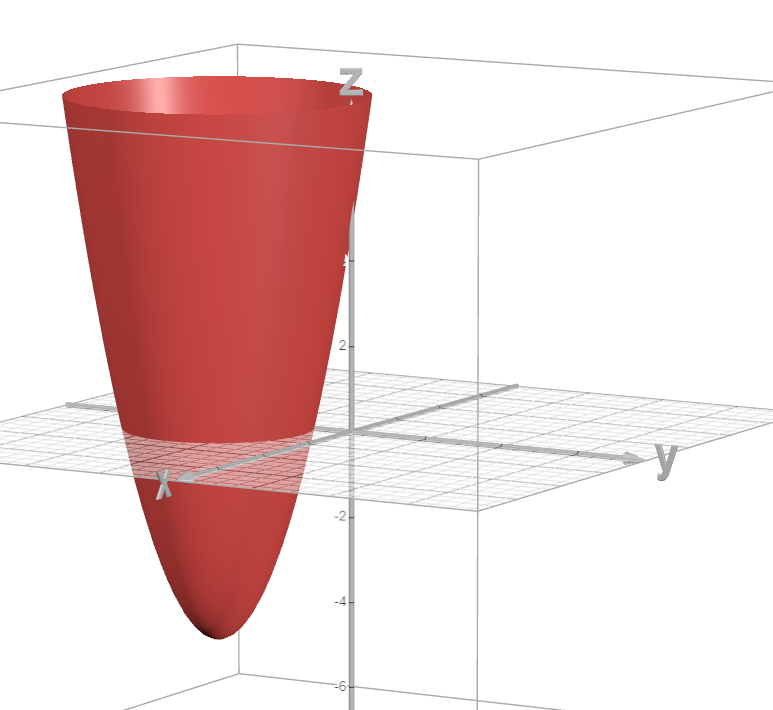

In [86]:
display(Image(filename="./Capture d’écran 2024-04-07 030215.png"))

Gradient Descent

The step size is a fixed step multiplied by the value of the gradient. Exit when gradient is null, or when you reach max iterations.

In [75]:
def getDirection(derivate_value):
    if derivate_value < 0 :
        return 1
    elif derivate_value > 0 :
        return -1
    return 0

def gradient_descent(fun, derivate, init_values, iterations_limit=1000, step=1, min_step=0.001):
    #initialize parameters
    derivate_values = {}
    iterations=0
    exit_counter=0
    history1 = [round(fun.evalf(subs=init_values),3)]
    # start searching
    while iterations<iterations_limit and exit_counter<number_of_vars:#exit when you reach optimum, or when you reach the maximum number of iterations
        iterations+=1
        for variable in vars_names:
            derivate_values[variable] = derivate[variable].evalf(subs=init_values)#calculate f derived by current var
            init_values[var[variable]] = round(init_values[var[variable]]-step*derivate_values[variable], 3)
            if abs(derivate_values[variable])<min_step:#exit if all derivates are almost 0
                exit_counter+=1
            else:
                exit_counter=0
        history1.append(round(fun.evalf(subs=init_values),3))
    return init_values, iterations, history1

initialisation = {}
for name in vars_names:
  initialisation[var[name]] = 0
optimum, total_iterations, gradient_descent_history=gradient_descent(user_function, first_derivates, initialisation, iterations_limit=1000, step=0.6)
optimum_value = round(user_function.evalf(subs=optimum),3)
print(f'The optimum is at {optimum}')
print(f'The optimum value is {optimum_value}')
print(f'Iterations {total_iterations}')

The optimum is at {x: 1.00000000000000, y: -3.00000000000000}
The optimum value is -5.00000000000000
Iterations 7


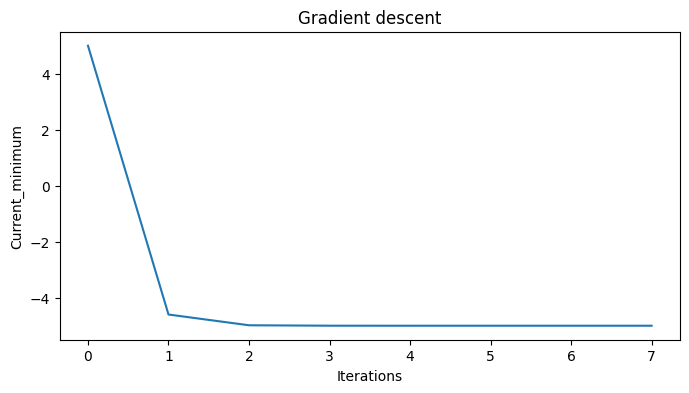

In [76]:
plt.figure(figsize=(8, 4))
plt.plot(gradient_descent_history)
plt.xlabel('Iterations')
plt.ylabel('Current_minimum')
plt.title('Gradient descent')
plt.show()

Steepest gradient descent

Step size is fixed. however I allowed the step to become smaller if it start oscillating. this will allow it to avoid getting stuck until it reach the iterations limit. Exit if the step become too small.

In [126]:
def steepest_gradient_descent(fun, derivate, init_values, iterations_limit=1000, alpha=1, alpha_decreasing_rate=0.5, min_alpha=0.001):
    #initialize parameters
    derivate_values = {}
    iterations=0
    # start searching
    history2=[round(fun.evalf(subs=init_values),3)]
    while iterations<iterations_limit and alpha >= min_alpha:#exit when you reach optimum, or when you reach the maximum number of iterations
        iterations+=1
        for variable in vars_names:
            derivate_values[variable] = derivate[variable].evalf(subs=init_values)
            init_values[var[variable]] = round(init_values[var[variable]]+alpha*getDirection(derivate_values[variable]), 3)#rounding to 3 digits
        history2.append(round(fun.evalf(subs=init_values),3))
        if history2[iterations-1]>=history2[iterations-2]:#if you do not improve
            alpha=alpha * alpha_decreasing_rate#try smaller steps
    return init_values, iterations, history2

initialisation = {}
for name in vars_names:
    initialisation[var[name]] = 0
optimum, total_iterations, steepest_gradient_descent_history=steepest_gradient_descent(user_function, first_derivates, initialisation, iterations_limit=1000, alpha=0.8)
optimum_value = round(user_function.evalf(subs=optimum),3)
print(f'The optimum is at {optimum}')
print(f'The optimum value is {optimum_value}')
print(f'Iterations {total_iterations}')

The optimum is at {x: 0.999, y: -3.001}
The optimum value is -5.00000000000000
Iterations 20


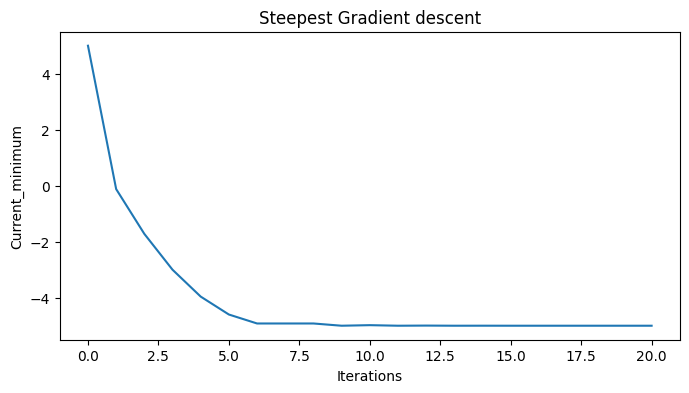

In [127]:
plt.figure(figsize=(8, 4))
plt.plot(steepest_gradient_descent_history)
plt.xlabel('Iterations')
plt.ylabel('Current_minimum')
plt.title('Steepest Gradient descent')
plt.show()

Newton algorithm

step size is first derivate devided by the second derivate. Or in case of multi variables, it is the Gradient multiplied by the inverse of the Hessian. Tested on two variables functions only.

In [132]:
#tested with 2 variables functions, not tested for 3+ vars
gradient = np.zeros(number_of_vars, dtype=int)
hessian = np.zeros((number_of_vars, number_of_vars), dtype=int)
def newton(fun, derivate1, derivate2, init_point, min_rate=0.001, iterations_limit=1000):
  #initialize parameters
  min_ratio=0.001
  iteration=0
  exit_counter=0
  history3=[round(fun.evalf(subs=init_point),3)]
  # start searching
  while iteration<iterations_limit and exit_counter<number_of_vars:
    iteration += 1
    for i in range(number_of_vars):
      gradient[i]=derivate1[vars_names[i]].evalf(subs=init_point)
      for j in range(i,number_of_vars):
        hessian[i][j]=hessian[j][i]=derivate2[i][j].evalf(subs=init_point)
    matrix_inverse = np.linalg.inv(hessian)
    result = gradient @ matrix_inverse
    for i in range(number_of_vars):
      init_point[var[vars_names[i]]] = round(init_point[var[vars_names[i]]]-result[i],3)
      if result[i] < min_rate:
        exit_counter+=1
      else:
        exit_counter=0
    history3.append(round(fun.evalf(subs=init_point),3))
  return init_point, iteration, history3

initialisation = {}
for name in vars_names:
  initialisation[var[name]] = 2.5
optimum, total_iterations, newton_history = newton(user_function, first_derivates, second_derivates, initialisation)
optimum_value = round(user_function.evalf(subs=optimum),3)
print(f'The optimum is at {optimum}')
print(f'The optimum value is {optimum_value}')
print(f'Iterations {total_iterations}')

The optimum is at {x: 1.0, y: -3.0}
The optimum value is -5.00000000000000
Iterations 2


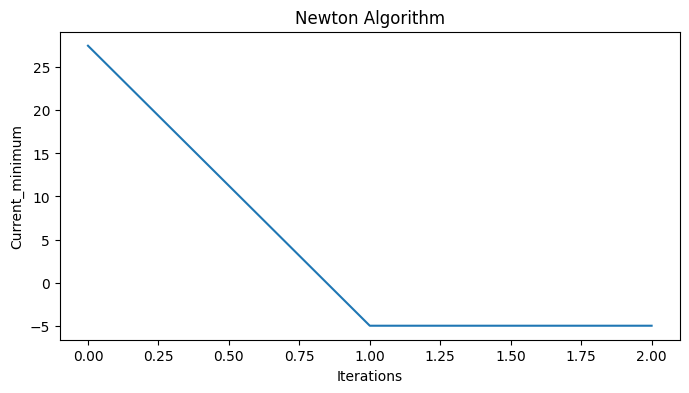

In [133]:
plt.figure(figsize=(8, 4))
plt.plot(newton_history)
plt.xlabel('Iterations')
plt.ylabel('Current_minimum')
plt.title('Newton Algorithm')
plt.show()

Newton algorithm require the least amount of iterations. However, each iteration have a high cost.